## Importando as bibliotecas necessárias



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score



print(pd.__version__)
print(np.__version__)

1.3.5
1.22.4



## Realizando a carga dos dados


In [ ]:
# 
hr = pd.read_csv('/content/HR_with_missings.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,NaN,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
hr.columns = hr.columns.str.upper()
hr.head()

,SATISFACTION_LEVEL,LAST_EVALUATION,NUMBER_PROJECT,AVERAGE_MONTLY_HOURS,TIME_SPEND_COMPANY,WORK_ACCIDENT,LEFT,PROMOTION_LAST_5YEARS,SALES,SALARY
0,0.38,NaN,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Início da Análise Exploratória dos Dados

In [ ]:
#
hr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SATISFACTION_LEVEL     14982 non-null  float64
 1   LAST_EVALUATION        14990 non-null  float64
 2   NUMBER_PROJECT         14999 non-null  int64  
 3   AVERAGE_MONTLY_HOURS   14999 non-null  int64  
 4   TIME_SPEND_COMPANY     14999 non-null  int64  
 5   WORK_ACCIDENT          14999 non-null  int64  
 6   LEFT                   14999 non-null  int64  
 7   PROMOTION_LAST_5YEARS  14999 non-null  int64  
 8   SALES                  14999 non-null  object 
 9   SALARY                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
hr.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14982.0,0.612976,0.248573,0.09,0.44,0.64,0.82,1.0
last_evaluation,14990.0,0.716121,0.171154,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


## Utilizar gráficos para identificação de dataset desbalanceados. 




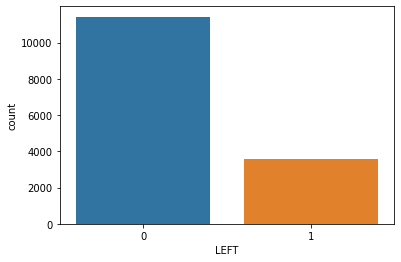

In [ ]:
#
distribuicao = sns.countplot(x='LEFT', data = hr)

## Utilizar um gráfico para verificar correlação entre duas variáveis de suas escolha no dataset. 

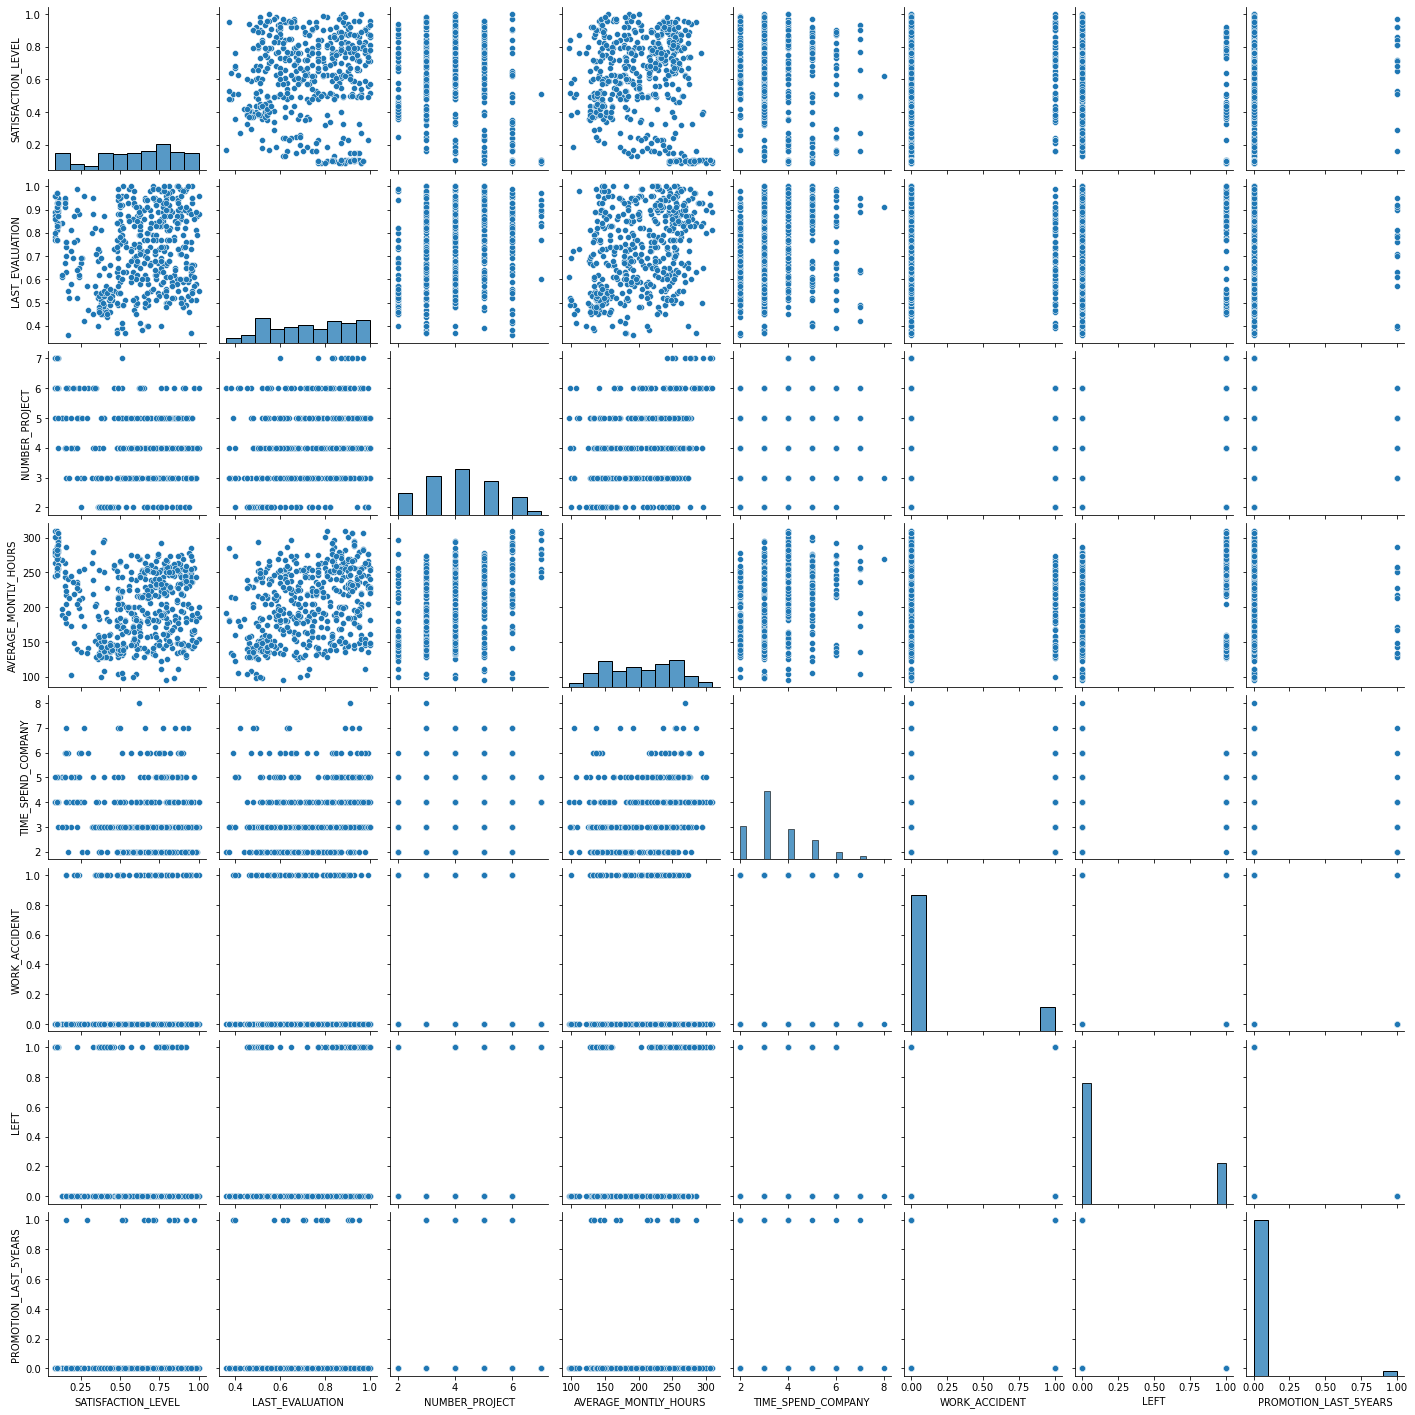

In [ ]:
#
sns.pairplot(data = hr.sample(500),
             palette = 'Set2')

## Resolver valores ausentes - Missing Values 

Com a utilização de qualquer uma das técnicas aprendidas durante a realizar imputação dos missing values. 

In [ ]:
# antes do tratamento
print(hr.isnull().sum())


SATISFACTION_LEVEL       17
LAST_EVALUATION           9
NUMBER_PROJECT            0
AVERAGE_MONTLY_HOURS      0
TIME_SPEND_COMPANY        0
WORK_ACCIDENT             0
LEFT                      0
PROMOTION_LAST_5YEARS     0
SALES                     0
SALARY                    0
dtype: int64


In [ ]:
# apagando registros
hr = hr.dropna(subset=['SATISFACTION_LEVEL', 'LAST_EVALUATION'])

In [ ]:
# depois do tratamento
print(hr.isnull().sum())


SATISFACTION_LEVEL       0
LAST_EVALUATION          0
NUMBER_PROJECT           0
AVERAGE_MONTLY_HOURS     0
TIME_SPEND_COMPANY       0
WORK_ACCIDENT            0
LEFT                     0
PROMOTION_LAST_5YEARS    0
SALES                    0
SALARY                   0
dtype: int64


## Substituindo os valores categóricos (nominais) por valores numéricos

Utilizando qualquer uma das técnicas aprendidas em sala de aula converter variáveis categóricas em variáveis numéricas.




In [ ]:
#
hr.head()


,SATISFACTION_LEVEL,LAST_EVALUATION,NUMBER_PROJECT,AVERAGE_MONTLY_HOURS,TIME_SPEND_COMPANY,WORK_ACCIDENT,LEFT,PROMOTION_LAST_5YEARS,SALES,SALARY
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low


In [ ]:
hr = pd.get_dummies(hr)


## Realizar a separação das vaviáveis INDEPENDENTES e variável DEPENDENTE.

In [ ]:
#
X = hr.loc[:, hr.columns != 'LEFT'].values
y = hr.loc[:, 'LEFT'].values

print(y)

[1 1 1 ... 1 1 1]


## Realizar a separação do conjunto de dados em TREINAMENTO E TESTES. Escolha o critério de separação (por exemplo: 30/70)

In [ ]:

PORCENTAGEM = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=PORCENTAGEM)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10481, 9)
(4492, 9)
(10481,)
(4492,)


## Criar pelo menos DOIS classificadores para treinamento dos modelos de Aprendizagem de Máquina


In [ ]:
#
classifiers = []

lr_classifier = LogisticRegression()

classifiers.append(lr_classifier)

In [ ]:
dt_classifier = DecisionTreeClassifier()

classifiers.append(dt_classifier)

In [ ]:
xg_classifier = XGBClassifier()

classifiers.append(xg_classifier)

## Verificando a acurácia do modelo utilizando pelo menos duas métricas (Acurácia e F1 Score)

In [ ]:
for clf in classifiers:
  print(clf)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  print(f1_score(y_test, y_pred))

LogisticRegression()
0.35504469987228604
DecisionTreeClassifier()


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9447513812154696
XGBClassifier()
0.9461134954697186
